# Image Segmentation & Morphological Operation


Pada tugas ini, diberikan gambar berupa mungkin mikro organisme berbentuk seperti pil yang nantinya akan disegmentasi. Contoh input dan output gambar adalah sebagai berikut.
<br/>
#### Input Gambar
<img src="Picture1.jpg" style="width: 90px;"/>
<br/>

#### Output Gambar
<img src="Picture2.jpg" style="width: 90px;"/>

Berikut langkah-langkah yang dilakukan untuk melakukan segmentasi gambar tersebut.

### 1. Memuat gambar kemudian menganalisis histogramnya

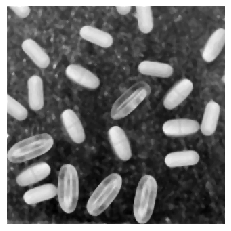

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('Picture1.jpg',0)

img_prep = cv2.medianBlur(img,5)
hist = cv2.calcHist([img_prep],[0],None,[256],[0,256])
plt.axis(False)
plt.imshow(img_prep,cmap='gray')


Pada gambar tersebut, dilakukan preprocessing dengan memblurkan gambar. Hal itu dilakukan untuk mengurangi noise bercak di latar belakang. Berikut merupakan persebaran histogram gambar tersebut.

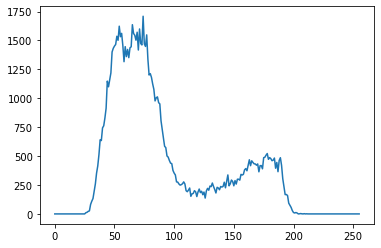

In [3]:
plt.plot(hist)
plt.show()

Dari Histogram citra di atas, dapat diketahui bahwa terdapat 2 bukit. Bukit pertama memiliki puncak yaitu di nilai antara 80 - 90, sementara bukit kedua nilainya yang tersebar di nilai antara 120 hingga 200. Dari citra tersebut selanjutnya akan dilakukan operasi image tresholding.


### 2. Image Tresholding

Operasi Image Tresholding yang dilakukan memakai batas di nilai 110.

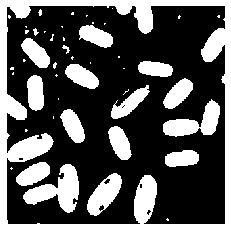

In [4]:
ret, img_tresh = cv2.threshold(img_prep,110,255,cv2.THRESH_BINARY)
plt.axis(False)
plt.imshow(img_tresh,cmap='gray')

Pada gambar di atas, dapat dilihat bahwa masih terdapat beberapa lubang di dalam gambar bentuk "pil" tersebut dan juga beberapa bercak hitam di bagian yang putih. Maka dari itu perlu dilakukan morphological operation pada gambar tersebut.

### 3. Morphological Operation

Morphological operation yang dilakukan pertama adalah operasi closing. Operasi tersebut dilakukan utnuk menutup lubang-lubang yang ada pada bagian dalam bentuk "pil". 

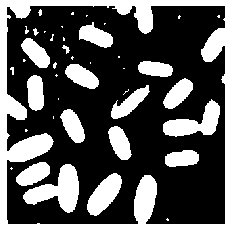

In [5]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
img_close = cv2.morphologyEx(img_tresh,cv2.MORPH_CLOSE, kernel)
plt.axis(False)
plt.imshow(img_close,cmap='gray')

Operasi closing di atas dilakukan dengan menggunakan kernel kotak dengan ukuran 5 x 5. Kernel cross diterapkan untuk memisahkan bagian sempit di antara bentuk "pil". Bentuk kernel kotak tersebut adalah sebagai berikut.

In [6]:
print(kernel)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


Pada langkah ini, terdapat bagian "pil" yang menyambung dengan bagian "pil" yang lain. Maka dari itu dilakukan operasi erosi untuk memisahkan bagian yang masih tersambung. Operasi ini juga dapat menghilangkan bercak-bercak putih pada citra tersebut.

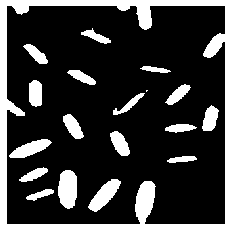

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,8))
img_erode = cv2.erode(img_close,kernel,iterations=2)
plt.axis(False)
plt.imshow(img_erode,cmap='gray')

Operasi erosi di atas dilakukan dengan menggunakan kernel palang (cross) dengan ukuran 3 x 8 dan dilakukan sebanyak 2 iterasi. Kernel cross diterapkan untuk memisahkan bagian sempit di antara bentuk "pil". Bentuk kernel palang tersebut adalah sebagai berikut.

In [8]:
print(kernel)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 1 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]]


Pada bagian sisi dari bagian "pil" masih terdapat bagian runcing. Untuk itu perlu dilakukan operasi smoothing dengan menggunakan median filter dengan ukuran kernel yaitu 7x7.

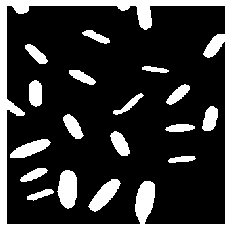

In [9]:
median_img = cv2.medianBlur(img_erode,7)
plt.axis(False)
plt.imshow(median_img,cmap='gray')

Pada bagian akhir, dilakukan operasi dilasi untuk memperbesar bagian "pil" dari citra di atas.

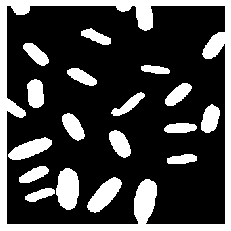

In [10]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
img_dilation = cv2.dilate(median_img,kernel,iterations=1)
plt.axis(False)
plt.imshow(img_dilation,cmap='gray')

Operasi dilasi di atas dilakukan dengan menggunakan kernel elips dengan ukuran 5 x 5 dan dilakukan sebanyak 1 iterasi. Bentuk kernel elips tersebut adalah sebagai berikut.

In [11]:
print(kernel)

[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


Terakhir, dilakukan invers citra agar pada bagian "pil" berwarna hitam dan bagian latar belakang berwarna putih. Berikut merupakan hasil akhir citra yang diproses.

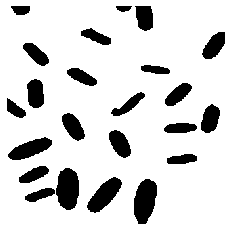

In [12]:
final_img = ~img_dilation
plt.axis(False)
plt.imshow(final_img,cmap='gray')